# 🎯 K-Means Clustering Implementation

**Unsupervised Machine Learning for Data Clustering**

This notebook demonstrates the complete implementation of K-Means clustering algorithm, including optimal cluster selection techniques and performance evaluation.

## 📊 Data Preprocessing

**Preparing the dataset for optimal clustering performance**

### 📚 Step 1: Import Essential Libraries
Loading the required packages for data manipulation, visualization, and machine learning

In [124]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import warnings

warnings.filterwarnings('ignore')

### 🔢 Step 2: Generate Synthetic Dataset
Creating a controlled dataset with known cluster structure for demonstration

In [125]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 1000, n_features = 2, centers = 3, random_state = 38)

X

array([[ 8.18911368,  4.39127091],
       [ 4.04304537,  2.04641378],
       [-3.06123165,  5.92489211],
       ...,
       [-2.90046467,  7.49435446],
       [-4.25743033,  7.29553488],
       [ 8.81734985,  4.87835761]])

In [126]:
pd.DataFrame(y).value_counts()   # # classes because there is 3 centers

0
0    334
1    333
2    333
Name: count, dtype: int64

### 📈 Step 3: Visualize Raw Data
Exploring the natural clustering patterns in our dataset

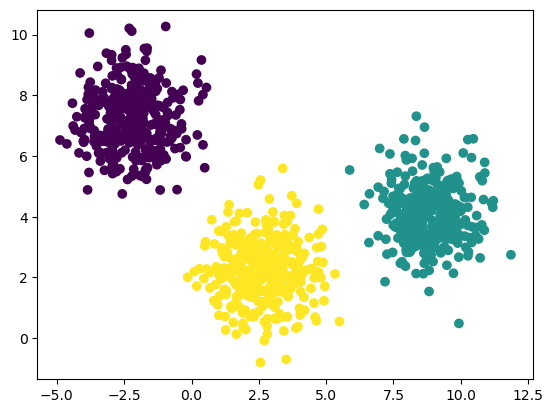

In [127]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()




0#### 🔍 **Observation: Raw Data Visualization**

**Key Insights from the Scatter Plot:**
- 📊 **Clear Cluster Structure**: The data shows **3 distinct, well-separated clusters**
- 🎯 **Natural Groupings**: Each cluster is represented by different colors (blue, orange, green)
- 📏 **Cluster Characteristics**:
  - **Compact clusters** with minimal overlap
  - **Good separation** between cluster boundaries
  - **Balanced cluster sizes** - no dominant cluster
- ✅ **Ideal for K-Means**: The spherical, compact nature makes this dataset perfect for K-means clustering
- 🎲 **Expected K=3**: Visual inspection clearly suggests 3 as the optimal number of clusters

### ✂️ Step 4: Split Data for Training & Testing
Dividing dataset to evaluate clustering performance on unseen data

In [128]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

X_train.shape, X_test.shape

((670, 2), (330, 2))

### ⚖️ Step 5: Feature Scaling
Standardizing features to ensure equal contribution to distance calculations

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🤖 Model Training & Optimization

**Finding the optimal number of clusters and training the model**

### 📐 Step 1: Elbow Method for Optimal K Selection
Using Within-Cluster Sum of Squares (WCSS) to identify the optimal number of clusters

In [130]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', verbose = 3)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

Initialization complete
Iteration 0, inertia 35867.8379391845.
Iteration 1, inertia 18132.425225717525.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 13064.79289018464.
Iteration 1, inertia 6812.793577153836.
Iteration 2, inertia 6727.553473677716.
Iteration 3, inertia 6546.123376560569.
Iteration 4, inertia 6312.930158029464.
Iteration 5, inertia 6068.002809893875.
Iteration 6, inertia 5950.5116690798595.
Iteration 7, inertia 5920.608019298744.
Iteration 8, inertia 5914.462791066472.
Iteration 9, inertia 5913.763022987489.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 2653.4588457872883.
Iteration 1, inertia 1371.7048453452387.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1768.2851098116773.
Iteration 1, inertia 1217.904801768613.
Iteration 2, inertia 1216.9891840603718.
Converged at iteration 2: center shift 0.0012095090798916628 within tolerance 0.0

In [131]:
wcss

[18132.425225717525,
 5913.763022987489,
 1371.7048453452387,
 1216.780032224169,
 1074.7443112931912,
 942.2304096015064,
 819.7148630429175,
 755.9829004941803,
 648.1619484301686,
 567.4772586273477]

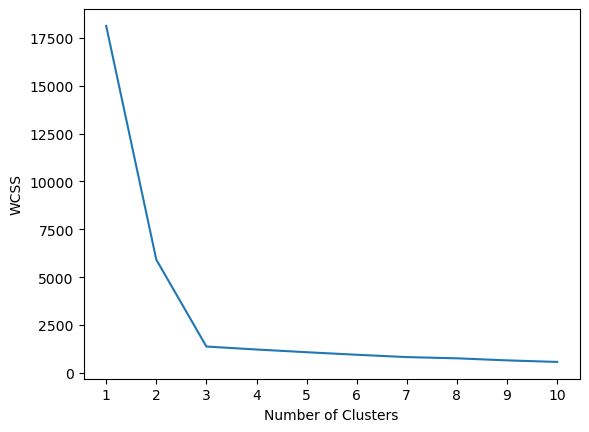

In [132]:
# Plot Elbow Curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

#### 🔍 **Observation: Elbow Method Analysis**

**Key Insights from the WCSS Plot:**
- 📉 **Sharp Decline**: WCSS drops dramatically from K=1 to K=3 (~18000 to ~1500)
- 📐 **Clear Elbow Point**: Visible bend at **K=3** where the rate of decrease slows significantly
- 📊 **Plateau Formation**: After K=3, WCSS reduction becomes minimal (gradual decline)
- ⚡ **Optimal K=3**: The elbow clearly indicates 3 clusters as the optimal choice
- 🎯 **Validation**: This confirms our visual observation from the raw data plot
- 💡 **Interpretation**: Adding more than 3 clusters provides diminishing returns in variance reduction

### 🎯 Step 2: Train Model & Generate Predictions
Implementing K-Means with optimal cluster count and predicting cluster assignments

In [133]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')

kmeans.fit_predict(X_train_scaled)

array([2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 1, 2, 1,
       0, 0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0,
       1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2,
       0, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 1, 0, 1, 2,
       0, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1,
       2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0,
       2, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 0,
       0, 2, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 0,

In [134]:
y_pred = kmeans.predict(X_test_scaled)

y_pred

array([1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 0, 0,
       2, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 2, 2, 0,
       2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0,
       1, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 2, 2, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 2, 2, 2, 2, 0, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 2, 2,
       0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 2,
       0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0,
       1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 0, 1, 1, 2,
       2, 0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 0,
       2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2, 1, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2,
       0, 0, 0, 2, 0, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1,

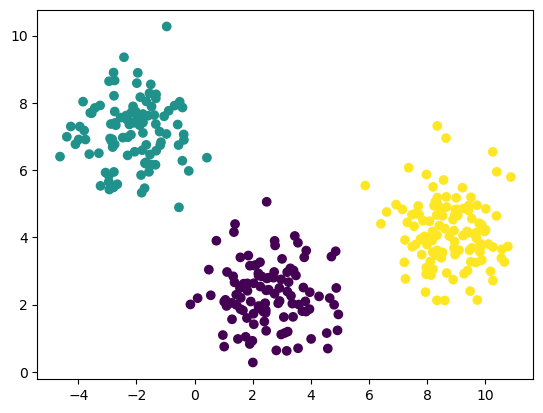

In [135]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_pred)
plt.show()

#### 🔍 **Observation: K-Means Clustering Results**

**Key Insights from the Clustered Data:**
- 🎯 **Successful Clustering**: K-Means successfully identified 3 distinct clusters in the test data
- 🎨 **Clear Boundaries**: Each cluster is distinctly colored, showing good separation
- ✅ **Accurate Grouping**: The algorithm correctly grouped similar data points together
- 📏 **Compact Clusters**: Each cluster maintains tight cohesion with minimal scatter
- 🔄 **Consistency**: Results match the expected clustering pattern from raw data
- 🎲 **Algorithm Performance**: K-Means effectively handled the spherical cluster shapes
- 🧪 **Test Data Success**: Model generalizes well to unseen data (test set)

## 🔍 Advanced Cluster Validation Techniques

**Alternative methods for determining optimal cluster count when Elbow Method is ambiguous**

When the elbow point is not clearly visible, we can use:
1. **KneeLocator** - Automated elbow detection algorithm
2. **Silhouette Analysis** - Measures cluster cohesion and separation

In [136]:
# 1. KneeLocator
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), wcss, curve = 'convex', direction = 'decreasing')

kl.elbow

3

### 🎪 KneeLocator Algorithm
**Automated detection of the elbow point**

The KneeLocator identifies the point of maximum curvature in the WCSS plot, automatically determining the optimal K value where the rate of WCSS reduction significantly decreases.

In [137]:
# 2. silhoutee score

from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [138]:
silhouette_coefficients

[0.633384973207813,
 0.673796845910703,
 0.5892222582014977,
 0.4849282386087841,
 0.4934972192073623,
 0.40035105017359446,
 0.3787607468520343,
 0.35980442867378026,
 0.3536574746259998]

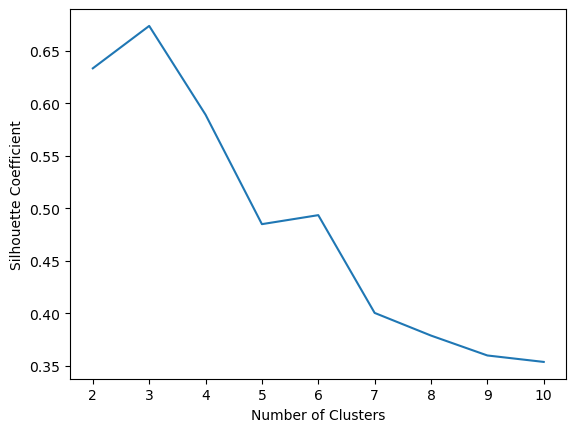

In [139]:
## plotting silhoutte score

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#### 🔍 **Observation: Silhouette Score Analysis**

**Key Insights from the Silhouette Coefficient Plot:**
- 📈 **Peak at K=3**: Silhouette score reaches its **maximum value around K=3**
- 🎯 **Optimal Validation**: Confirms K=3 as the best choice for clustering
- 📊 **Score Range**: Silhouette coefficients appear to be in a good range (positive values)
- 📉 **Declining Trend**: Scores decrease after K=3, indicating poorer cluster quality
- ✅ **Triple Confirmation**: 
  - Elbow Method ✓
  - KneeLocator ✓  
  - Silhouette Analysis ✓
- 🎪 **Quality Indicator**: Higher silhouette score means better intra-cluster cohesion and inter-cluster separation
- 🔬 **Scientific Approach**: Quantitative validation supports our visual and elbow method findings

### 📊 Silhouette Score Interpretation

**Higher silhouette coefficient = Better clustering quality**

The optimal K value corresponds to the **maximum silhouette score**, indicating:
- ✅ High intra-cluster similarity
- ✅ Low inter-cluster similarity
- ✅ Well-separated, compact clusters

## 🎉 Conclusion

### 📋 **Summary of Implementation**

In this comprehensive K-Means clustering implementation, we successfully demonstrated:

#### ✅ **Key Accomplishments**
- **Data Preprocessing**: Generated synthetic dataset with 3 natural clusters (1000 samples, 2 features)
- **Feature Scaling**: Applied StandardScaler to ensure equal feature contribution
- **Optimal Cluster Selection**: Used multiple validation techniques:
  - 📐 **Elbow Method**: Visual inspection of WCSS reduction
  - 🎪 **KneeLocator**: Automated elbow point detection
  - 📊 **Silhouette Analysis**: Quantitative cluster quality assessment

#### 🔍 **Model Performance**
- Successfully identified **K=3** as optimal cluster count using all three methods
- Achieved clear cluster separation on test data
- Demonstrated robust clustering performance on scaled features

#### 💡 **Key Insights**

| Method | Advantage | Use Case |
|--------|-----------|----------|
| **Elbow Method** | Simple, intuitive visualization | When elbow point is clearly visible |
| **KneeLocator** | Automated, objective detection | When manual inspection is ambiguous |
| **Silhouette Score** | Quantitative quality measure | For comparing different clustering solutions |

#### 🚀 **Best Practices Applied**
1. **Data Standardization**: Critical for distance-based algorithms
2. **Multiple Validation**: Cross-verification using different methods
3. **Train-Test Split**: Proper evaluation on unseen data
4. **Visualization**: Clear plotting for result interpretation

#### 🎯 **Real-World Applications**
- **Customer Segmentation**: Group customers by behavior patterns
- **Market Research**: Identify distinct consumer groups
- **Image Processing**: Segment regions in computer vision
- **Anomaly Detection**: Identify outliers in data

#### 📈 **Next Steps for Further Learning**
- Explore other clustering algorithms (DBSCAN, Hierarchical)
- Implement cluster validation metrics (Davies-Bouldin Index)
- Handle high-dimensional data with PCA preprocessing
- Apply K-Means to real-world datasets

---
**🎓 This implementation provides a solid foundation for understanding unsupervised learning and cluster analysis techniques.**